**Source:**

This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. The dataset was used in the 1983 American Statistical Association Exposition.


**Data Set Information:**

This dataset is a slightly modified version of the dataset provided in the StatLib library. In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for the "mpg" attribute. The original dataset is available in the file "auto-mpg.data-original". 

"The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes." (Quinlan, 1993)


**Attribute Information:**

1. mpg: continuous 
2. cylinders: multi-valued discrete 
3. displacement: continuous 
4. horsepower: continuous 
5. weight: continuous 
6. acceleration: continuous 
7. model year: multi-valued discrete 
8. origin: multi-valued discrete 
9. car name: string (unique for each instance)



Below description can be found for this data set. 

https://archive.ics.uci.edu/ml/datasets/auto+mpg

In [1]:
#making the imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the data set

df = pd.read_csv('../input/auto-mpg.csv')

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
#checking for columns and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null int64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
car name        398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
#checking for any nulls
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [6]:
#checking for shape
df.shape

(398, 9)

In [7]:
#checking for value counts in horse power column
df['horsepower'].value_counts()

150    22
90     20
88     19
110    18
100    17
95     14
75     14
70     12
67     12
105    12
65     10
85      9
97      9
145     7
140     7
80      7
72      6
84      6
92      6
78      6
?       6
68      6
175     5
130     5
115     5
180     5
86      5
170     5
71      5
60      5
       ..
152     1
142     1
94      1
113     1
91      1
220     1
122     1
103     1
135     1
102     1
148     1
66      1
77      1
167     1
93      1
54      1
208     1
137     1
49      1
193     1
108     1
133     1
61      1
138     1
200     1
210     1
116     1
64      1
149     1
89      1
Name: horsepower, Length: 94, dtype: int64

We can see that there are 6 values with question mark (missing). 

In [8]:
#below rows have the horse power values missing. 
df[df['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


Now we can choose to replace the missing values with the mean of 'horse power' column or the mode value.  But we will eliminate the missing values. 

In [9]:
#removing the missing values
df = df[df['horsepower'] != '?']

In [10]:
#checking the shape of new df
df.shape

(392, 9)

In [11]:
#converting the data type of horsepower column
df.horsepower = df.horsepower.astype('float')

In [12]:
#checking for data types
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

# Elploratory Data Analysis (EDA)

Lets do some EDA to check for distribution of different columns.

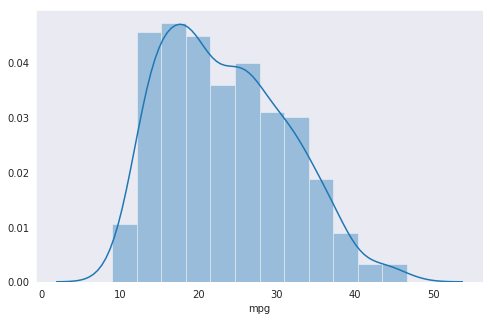

In [13]:
plt.figure(figsize = (8,5))
sns.set_style('dark')
sns.distplot(df['mpg'])
plt.show()

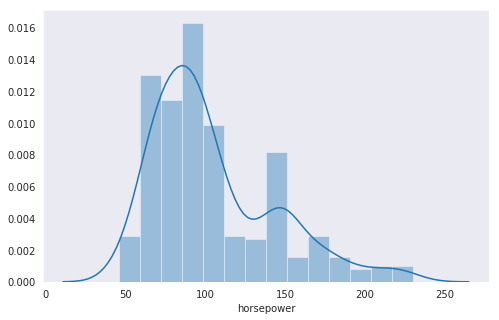

In [14]:
plt.figure(figsize = (8,5))
sns.set_style('dark')
sns.distplot(df['horsepower'])
plt.show()

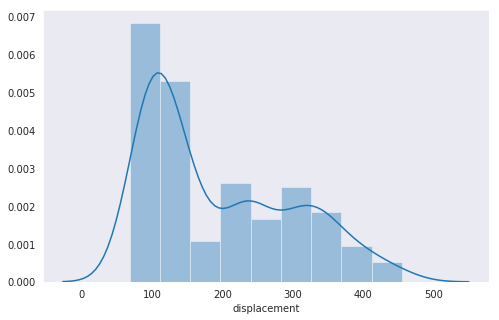

In [15]:
plt.figure(figsize = (8,5))
sns.set_style('dark')
sns.distplot(df['displacement'])
plt.show()

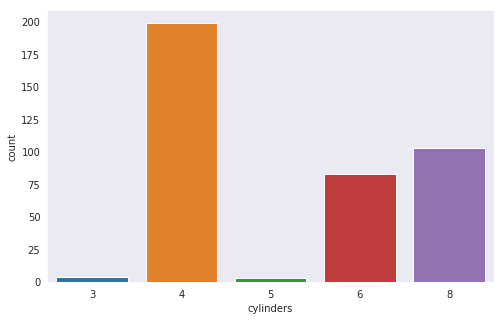

In [16]:
plt.figure(figsize = (8,5))
sns.set_style('dark')
sns.countplot(df['cylinders'])
plt.show()

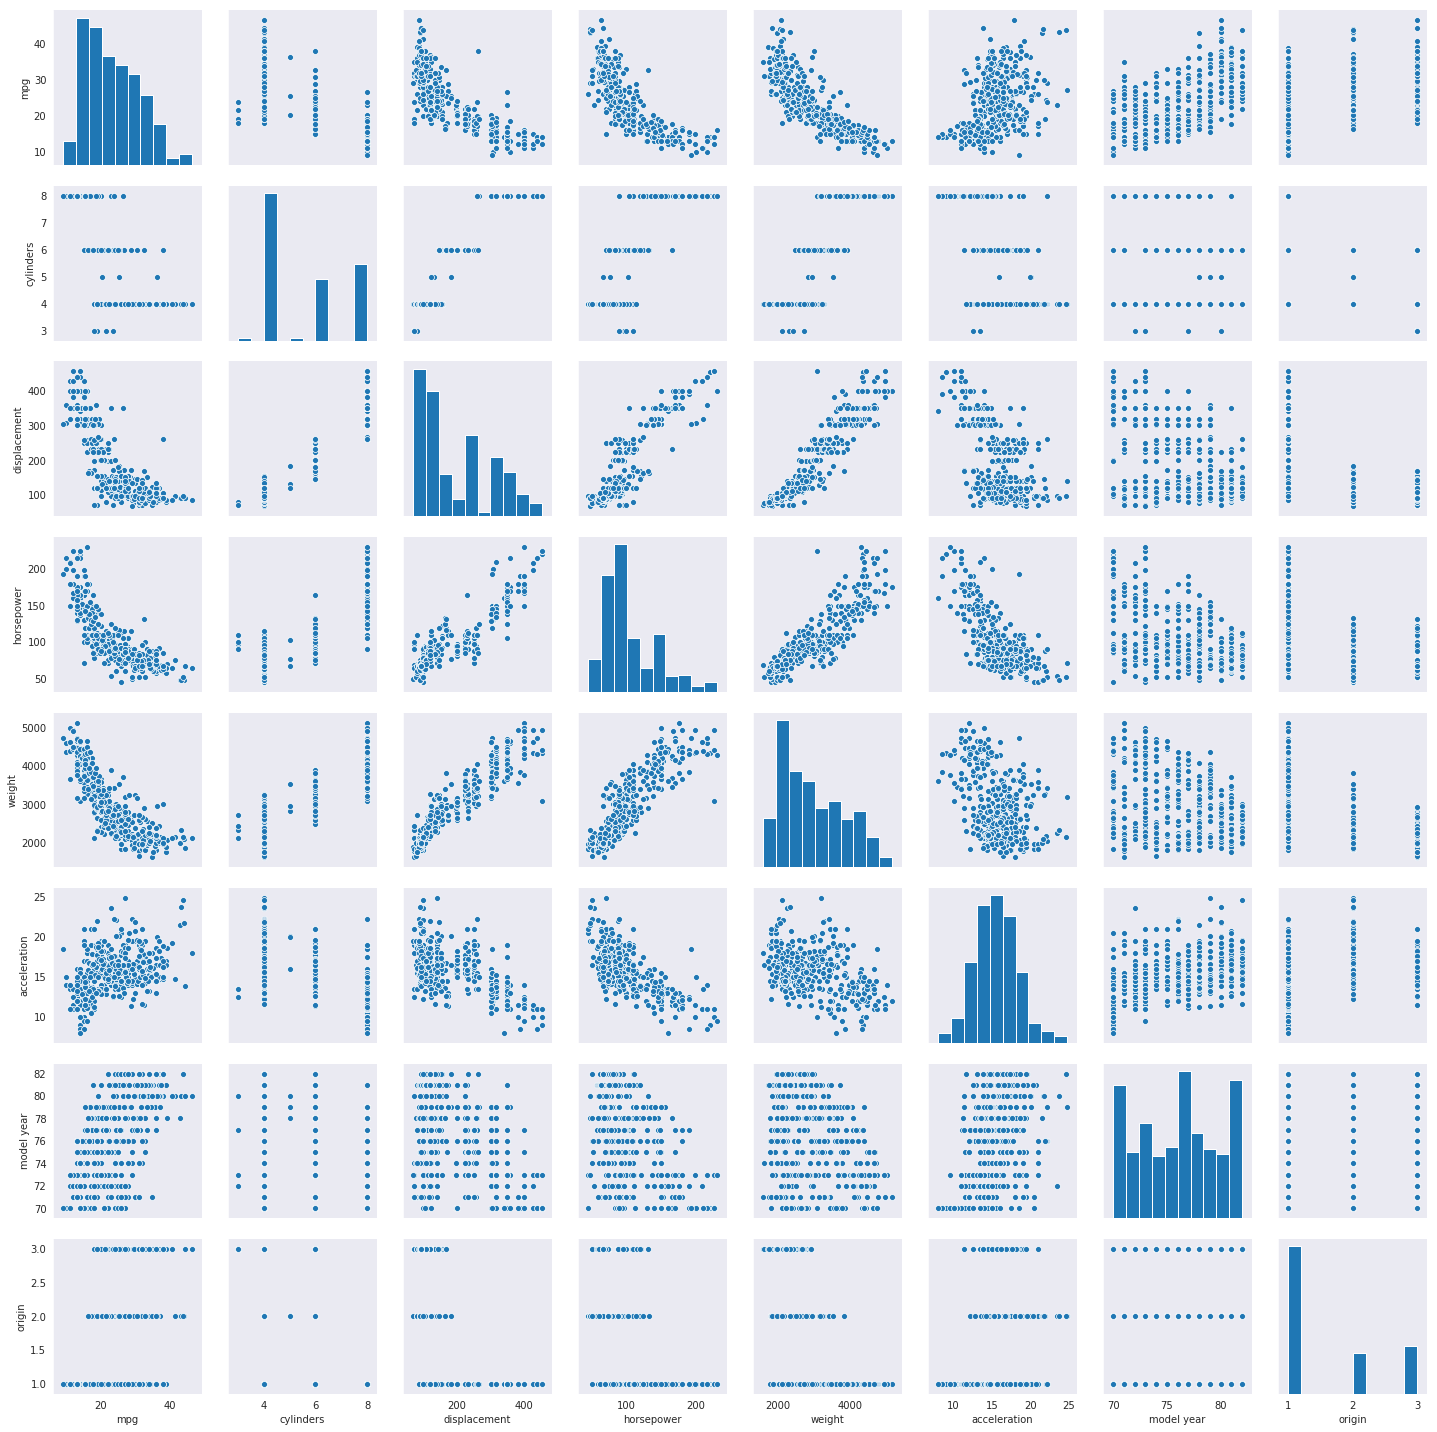

In [17]:
#checking the pair plot for numerical columns
sns.pairplot(df.drop(['car name'], axis =1))
plt.show()

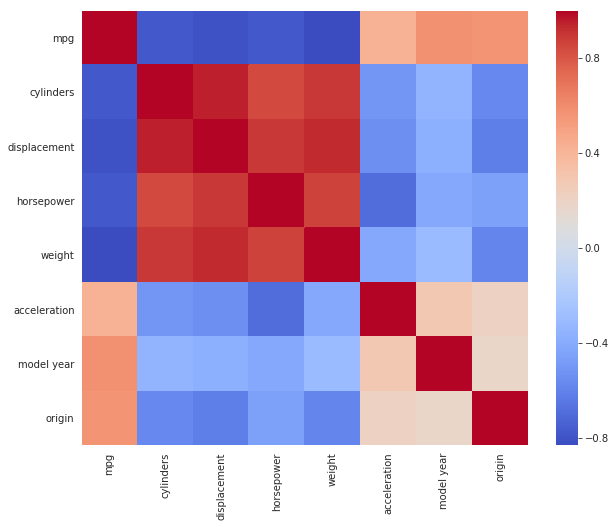

In [18]:
#heat map of numerical columns
temp_df = df.drop(['car name'], axis = 1)
corr = temp_df.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corr, cmap='coolwarm')
plt.show()

# Scaling the data

In [19]:
#define the scaling function

def scaling_func(x):
    
    y = (x - x.min())/(x.max() - x.min())
    return y


In [20]:
#apply the scaling to numerical columns

df['displacement'] = scaling_func(df['displacement'])
df['horsepower'] = scaling_func(df['horsepower'])
df['acceleration'] = scaling_func(df['acceleration'])
df['weight'] = scaling_func(df['weight'])
df['cylinders'] = scaling_func(df['cylinders'])
df['model year'] = scaling_func(df['model year'])
df['origin'] = scaling_func(df['origin'])

In [21]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,1.0,0.617571,0.456522,0.536150,0.238095,0.0,0.0,chevrolet chevelle malibu
1,15.0,1.0,0.728682,0.646739,0.589736,0.208333,0.0,0.0,buick skylark 320
2,18.0,1.0,0.645995,0.565217,0.516870,0.178571,0.0,0.0,plymouth satellite
3,16.0,1.0,0.609819,0.565217,0.516019,0.238095,0.0,0.0,amc rebel sst
4,17.0,1.0,0.604651,0.510870,0.520556,0.148810,0.0,0.0,ford torino


In [22]:
#splitting the data into train and test with 80/20 ratio
train_dataset = df.sample(frac=0.8,random_state=0)
test_dataset = df.drop(train_dataset.index)

In [23]:
#separating the labels
train_labels = train_dataset.pop('mpg')
test_labels = test_dataset.pop('mpg')

In [24]:
#dropping the car name column
test_dataset.drop('car name', axis =1 , inplace = True)
train_dataset.drop('car name', axis = 1, inplace = True)


In [25]:
#converting to a np array
train_dataset = train_dataset.values
train_labels = train_labels.values

test_dataset = test_dataset.values
test_labels = test_labels.values

## Building the Neural Net Model

In [26]:
# TensorFlow and kera import
import tensorflow as tf
from tensorflow import keras

In [27]:
#define the model

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(64, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(1))

In [28]:
#compile the model

model.compile(loss= 'mean_squared_error', optimizer= 'RMSprop', metrics= ['mean_absolute_error', 'mean_squared_error'])

In [29]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model.fit(
  train_dataset, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [30]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
995,5.109438,1.555566,5.109438,7.804677,2.067005,7.804677,995
996,5.283386,1.584159,5.283386,8.036167,2.121354,8.036167,996
997,5.086448,1.588145,5.086449,7.932640,2.129719,7.932641,997
998,5.241987,1.592304,5.241987,8.188074,2.188105,8.188074,998
999,5.120362,1.595230,5.120362,7.809784,2.059444,7.809784,999


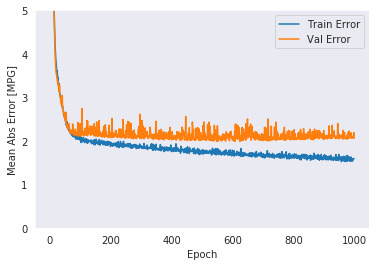

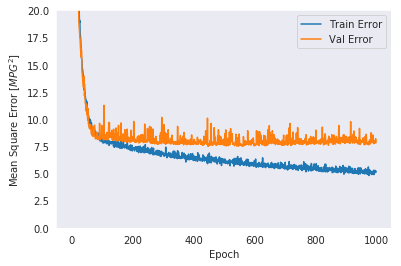

In [31]:
#plotting function for MAE and MSE
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(history)

As we can see that after about 100 epochs no significant improvement is observed in the Validation Error. Now we will use early stopping to stop the training if there is no significant improvement after a certain number of epochs. 


....................

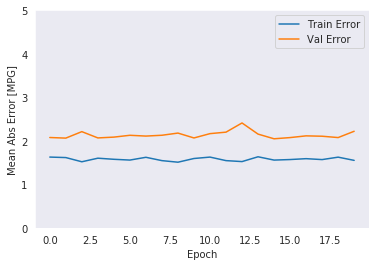

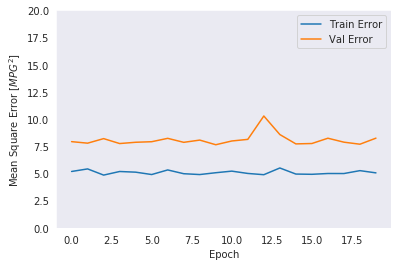

In [32]:
# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(train_dataset, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

## Checking the Model performance on Test Data

In [33]:
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=0)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

Testing set Mean Abs Error:  1.95 MPG


## Making the Predictions
Lets make predictions and compare them with actual values. 

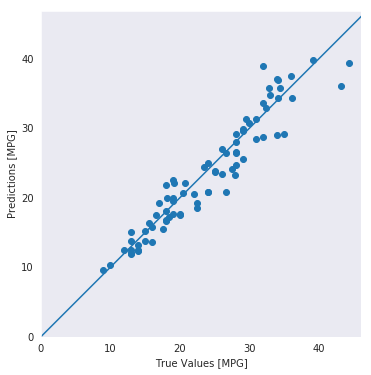

In [34]:
test_predictions = model.predict(test_dataset).flatten()

plt.figure(figsize = (8,6))
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

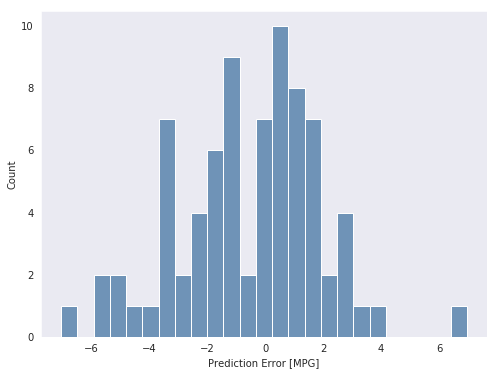

In [35]:
#let's check for the error distribution

error = test_predictions - test_labels
plt.figure(figsize = (8,6))
plt.hist(error, bins = 25, color = '#6f93b7')
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

In **Summary** we can say that:

**Scaling** is important to bring all features on a similar scale.

When there is less data then we should use a small neural network with **less Hidden Layers** to avoid **Overfitting**.

**Early Stopping** is also a useful technique to prevent overfitting. 


